# Behavioral Cloning

# The Data
**The data set contains one image folder and one CSV file**
**The image folder contains 12,159 images of car with the center view, right view, and left view. CSV file contain total 7 columns**
  >- **Column 1:** *Image location of the car captured while driving from the center view*
  >- **Column 2:** *Image location of the car captured while driving from the left view*
  >- **Column 3:** *Image location of the car captured while driving from the right view*
  >- **Column 4:** *Steering Angle*
  >- **Column 5:** *Throttle*
  >- **Column 6:** *Reverse*
  >- **Column 7:** *Speed of the car*

### Importing Required libraries to make the model work

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

#### Importing CSV file

In [2]:
datadir = 'D:\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track'
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'))

In [3]:
data

,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_382.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_382.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_382.jpg,0,0.1,0.2,0.6497864
0,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.627942
1,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.622910
2,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.619162
3,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.615438
4,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.610506
...,...,...,...,...,...,...,...
4047,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,26.017680
4048,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,25.808640
4049,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,25.652960
4050,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,25.446850


In [4]:
data.columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

In [5]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.627942
1,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.622910
2,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.619162
3,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.615438
4,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,D:\Ryuzaki Project\Deep Learning Project\Self ...,0.0,0.0,0.0,0.610506


In [6]:
pd.set_option('display.max_colwidth', -1)

C:\Users\gujja\AppData\Local\Temp\ipykernel_13796\2932368685.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [7]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_670.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_670.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_724.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_724.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_792.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_792.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_860.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_860.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\center_2022_12_06_17_11_43_930.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\left_2022_12_06_17_11_43_930.jpg,D:\Ryuzaki Project\Deep Learning Project\Self Driving Car\Car Track\IMG\right_2022_12_06_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


In [8]:
ntpath.split(data['center'][0])

('D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track\\IMG',
 'center_2022_12_06_17_11_43_670.jpg')

In [9]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

In [10]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2022_12_06_17_11_43_670.jpg,left_2022_12_06_17_11_43_670.jpg,right_2022_12_06_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,center_2022_12_06_17_11_43_724.jpg,left_2022_12_06_17_11_43_724.jpg,right_2022_12_06_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,center_2022_12_06_17_11_43_792.jpg,left_2022_12_06_17_11_43_792.jpg,right_2022_12_06_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,center_2022_12_06_17_11_43_860.jpg,left_2022_12_06_17_11_43_860.jpg,right_2022_12_06_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,center_2022_12_06_17_11_43_930.jpg,left_2022_12_06_17_11_43_930.jpg,right_2022_12_06_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


## Data Visualization

In [11]:
num_bins = 27
hist, bins = np.histogram(data["steering"], num_bins)
print(bins)

[-1.         -0.92592593 -0.85185185 -0.77777778 -0.7037037  -0.62962963
 -0.55555556 -0.48148148 -0.40740741 -0.33333333 -0.25925926 -0.18518519
 -0.11111111 -0.03703704  0.03703704  0.11111111  0.18518519  0.25925926
  0.33333333  0.40740741  0.48148148  0.55555556  0.62962963  0.7037037
  0.77777778  0.85185185  0.92592593  1.        ]


In [12]:
num_bins = 25
hist, bins = np.histogram(data["steering"], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [13]:
num_bins = 25
hist, bins = np.histogram(data["steering"], num_bins)
center =  (bins[:-1] + bins[1:])* 0.5
print(center)

[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


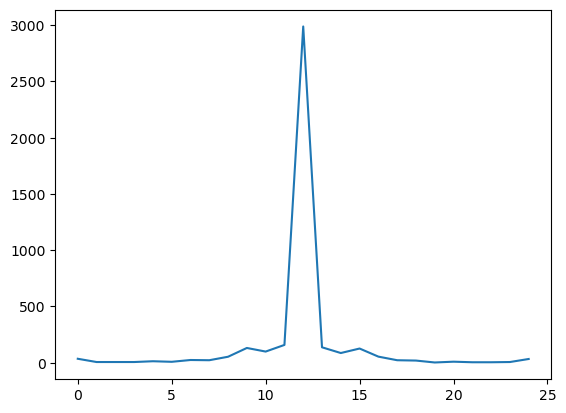

In [14]:
num_bins = 25
hist, bins = np.histogram(data["steering"], num_bins)
center =  (bins[:-1] + bins[1:])* 0.5
plt.plot(hist)

<BarContainer object of 25 artists>

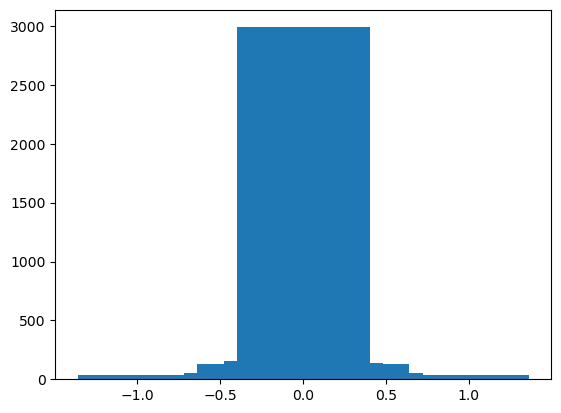

In [15]:
num_bins = 25
hist, bins = np.histogram(data["steering"], num_bins)
center =  (bins[:-1] + bins[1:])* 0.5
plt.bar(center, hist)

<BarContainer object of 25 artists>

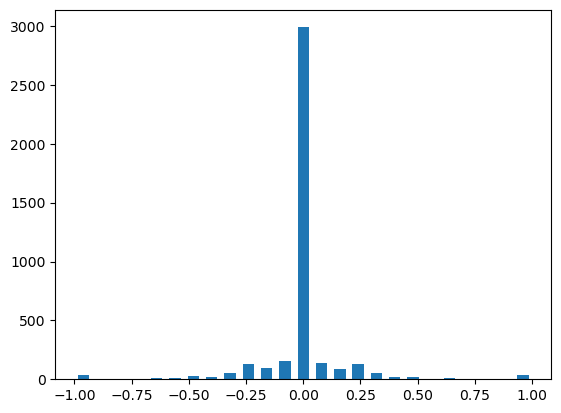

In [16]:
num_bins = 25
hist, bins = np.histogram(data["steering"], num_bins)
center =  (bins[:-1] + bins[1:])* 0.5
plt.bar(center, hist, width=0.05)

In [17]:
data["steering"].min()

-1.0

In [18]:
data["steering"].max()

1.0

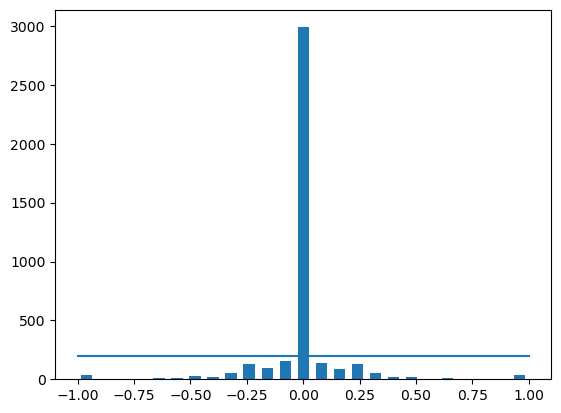

In [19]:
num_bins = 25
sample_per_bin = 200
hist, bins = np.histogram(data["steering"], num_bins)
center =  (bins[:-1] + bins[1:])* 0.5
plt.bar(center, hist, width=0.05)
plt.plot((data["steering"].min(), data["steering"].max()), (sample_per_bin, sample_per_bin))

## Balancing data

In [20]:
remove_list = []
for j in range(num_bins):
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [21]:
# remove_list = []
# for j in range(num_bins):
#     list_ = []
#     for i in range(len(data["steering"])):
# #         print(i)

In [22]:
# remove_list = []
# for j in range(num_bins):
#     # print(bins[j])

In [23]:
# remove_list = []
# for j in range(num_bins):
#     for i in range(len(data["steering"])):
#         # print(data["steering"][i])

In [24]:
# remove_list = []
# for j in range(num_bins):
#     for i in range(len(data["steering"])):
#         if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j+1]:
#             # print(data["steering"][i])

In [25]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[sample_per_bin:]
    remove_list.extend(list_)

In [26]:
print("removed", len(remove_list))

removed 2789


In [27]:
print(("Total Bins", len(data)))

('Total Bins', 4052)


In [28]:
data.drop(data.index[remove_list], inplace=True)

In [29]:
print("remaining", len(data))

remaining 1263


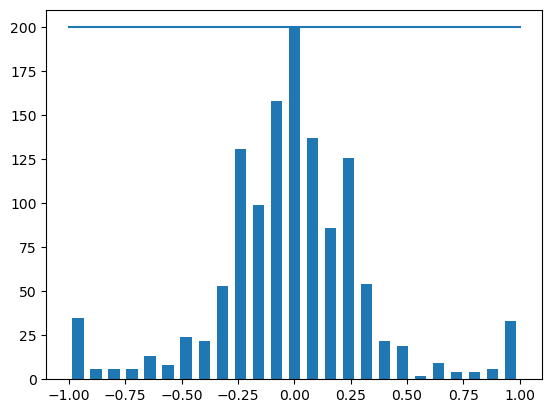

In [30]:
hist, _ = np.histogram(data["steering"], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((data["steering"].min(), data["steering"].max()), (sample_per_bin, sample_per_bin))

In [31]:
data.iloc[0]

center      center_2022_12_06_17_11_44_413.jpg
left        left_2022_12_06_17_11_44_413.jpg  
right       right_2022_12_06_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0.0                               
speed       1.434013                          
Name: 11, dtype: object

In [32]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [33]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [34]:
image_paths

array(['D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_11_44_413.jpg',
       'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_11_44_485.jpg',
       'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_11_44_558.jpg',
       ...,
       'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_16_30_492.jpg',
       'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_16_30_704.jpg',
       'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_16_31_329.jpg'],
      dtype='<U106')

## Scikit Learn - Train Test Split

In [35]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

In [37]:
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1010
Valid Samples: 253


Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |

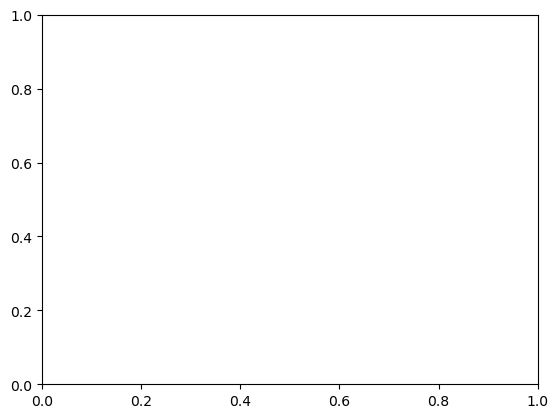

In [38]:
help(plt.subplots())

### Visualizing Data Balance between Training Data and Test Data

Text(0.5, 1.0, 'Validation Set')

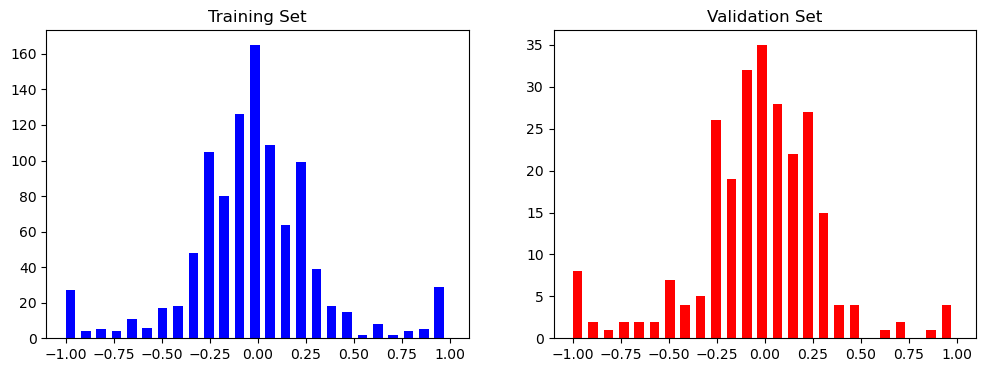

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation Set')

In [40]:
mpimg.imread(X_train[0])

array([[[147, 183, 235],
        [147, 183, 235],
        [146, 182, 234],
        ...,
        [106, 134, 173],
        [106, 134, 173],
        [106, 134, 173]],

       [[147, 183, 235],
        [147, 183, 235],
        [147, 183, 235],
        ...,
        [106, 134, 173],
        [106, 134, 173],
        [106, 134, 173]],

       [[148, 184, 236],
        [148, 184, 236],
        [148, 184, 236],
        ...,
        [107, 135, 174],
        [107, 135, 174],
        [107, 135, 174]],

       ...,

       [[147, 145, 124],
        [143, 141, 120],
        [144, 142, 121],
        ...,
        [130, 131, 117],
        [116, 117, 103],
        [103, 104,  90]],

       [[113, 111,  90],
        [130, 128, 107],
        [150, 148, 127],
        ...,
        [131, 132, 118],
        [139, 140, 126],
        [139, 140, 126]],

       [[157, 155, 134],
        [154, 152, 131],
        [153, 151, 130],
        ...,
        [ 96,  97,  83],
        [123, 124, 110],
        [149, 150, 136]]

## Preprocessing Images

In [41]:
def img_preprocessing(img):
    img = mpimg.imread(img)
    return img

In [42]:
image = image_paths[100]

In [43]:
image

'D:\\Ryuzaki Project\\Deep Learning Project\\Self Driving Car\\Car Track/IMG\\center_2022_12_06_17_12_00_518.jpg'

Text(0.5, 1.0, 'Preprocessing Image')

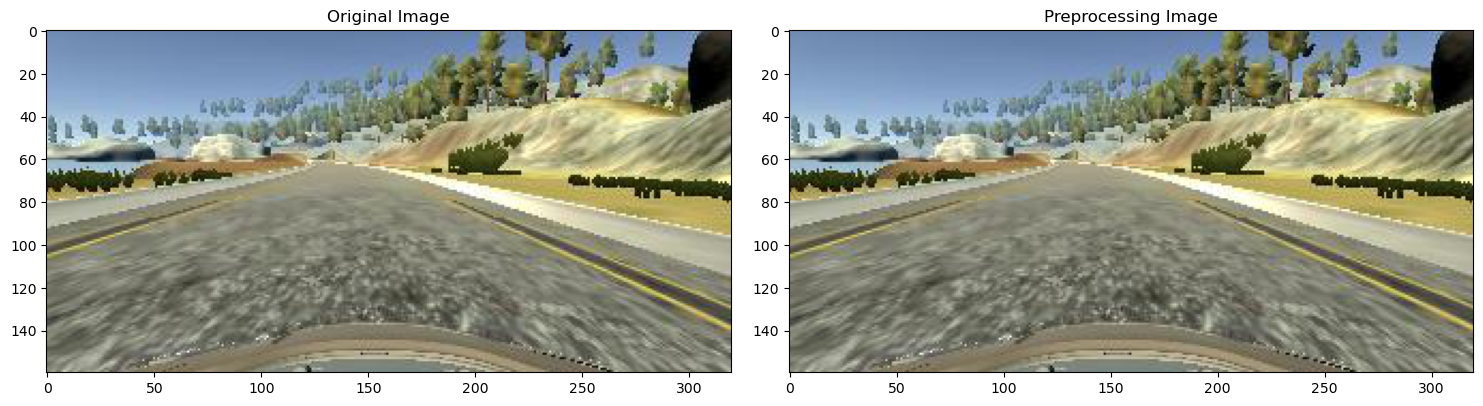

In [44]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessing Image')

#### Cropping the Image

In [45]:
ef img_preprocessing(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :]
    return img

Text(0.5, 1.0, 'Preprocessing Image')

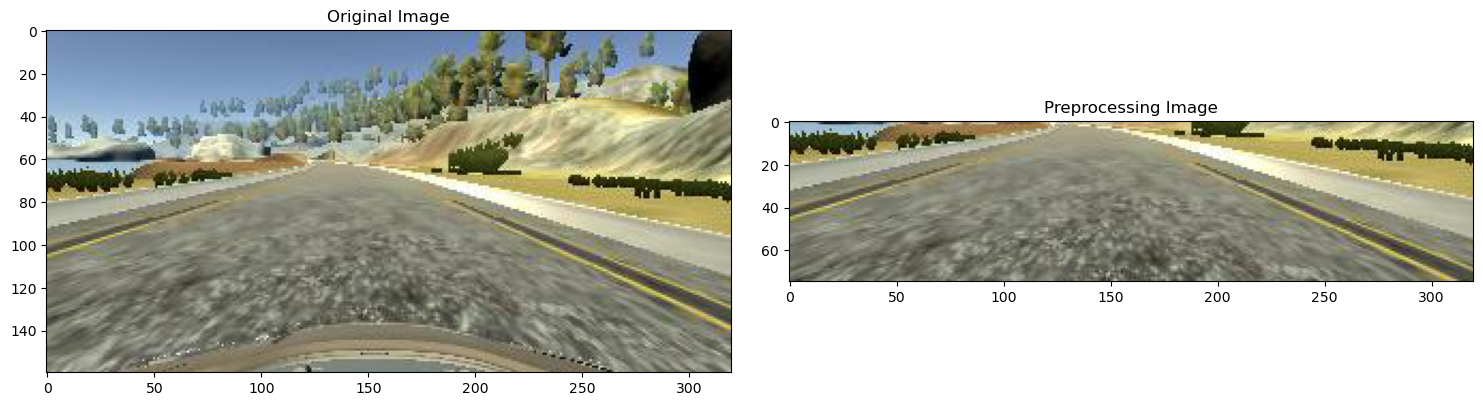

In [46]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessing Image')

#### Converting RGB color image to YUV

In [47]:
def img_preprocessing(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

Text(0.5, 1.0, 'Preprocessing Image')

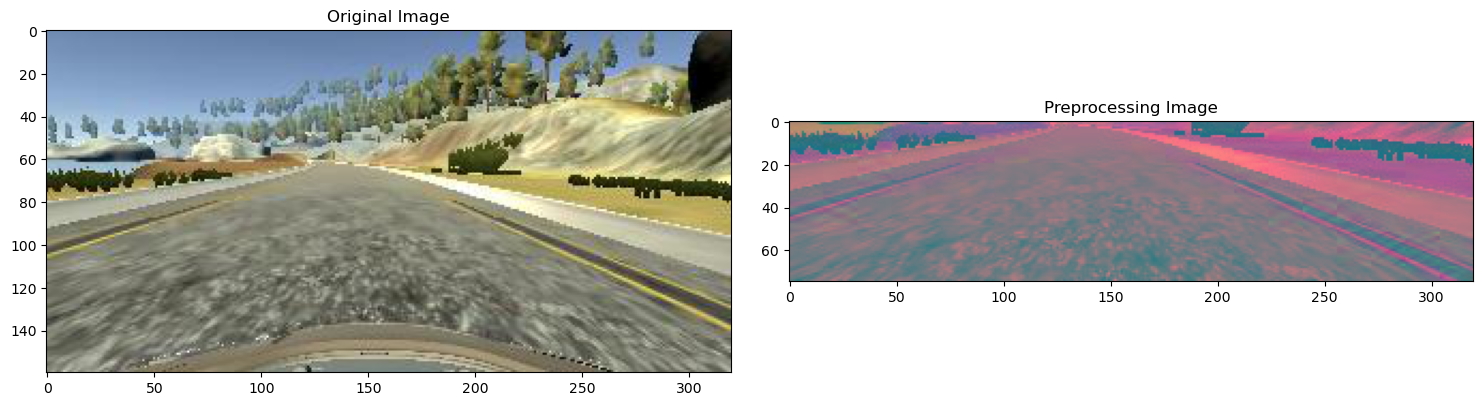

In [48]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessing Image')

#### Adding GaussianBlur to the images

In [49]:
def img_preprocessing(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    return img

Text(0.5, 1.0, 'Preprocessing Image')

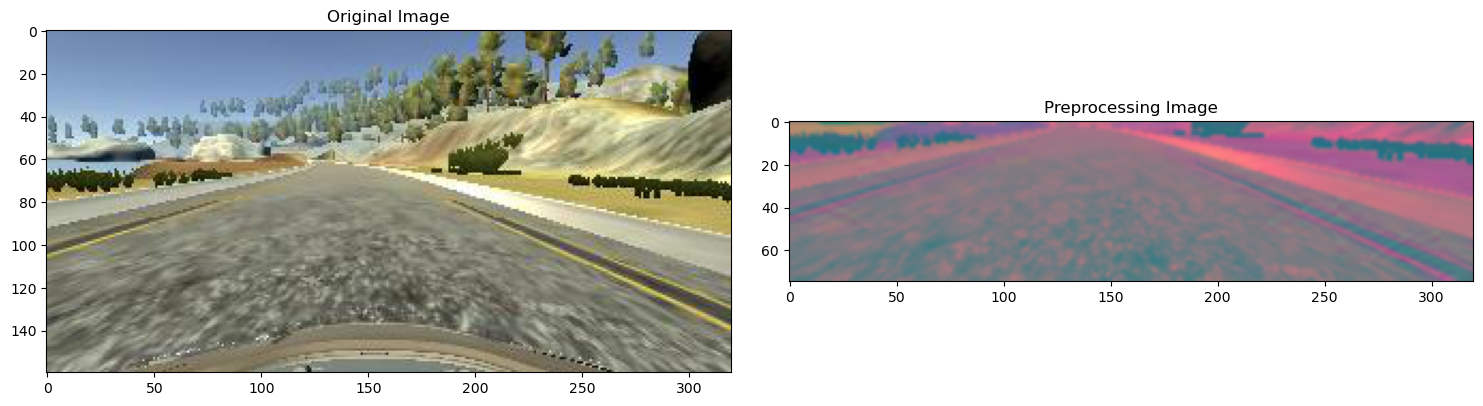

In [50]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessing Image')

In [51]:
def img_preprocessing(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessing Image')

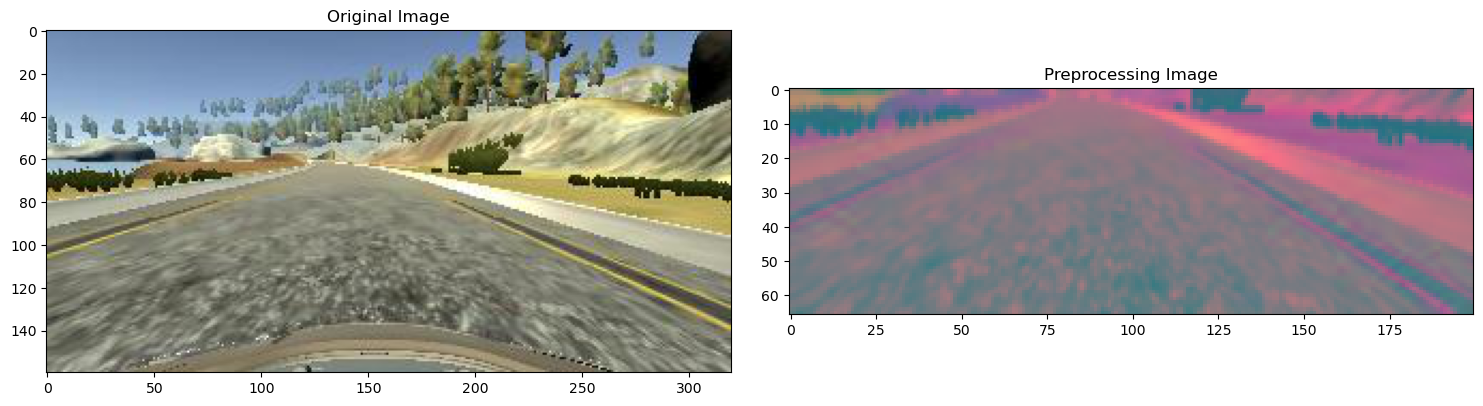

In [52]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessing Image')

In [53]:
map(img_preprocessing, X_train)

In [55]:
X_train = np.array(list(map(img_preprocessing, X_train)))
X_valid = np.array(list(map(img_preprocessing, X_valid)))

(1010, 66, 200, 3)


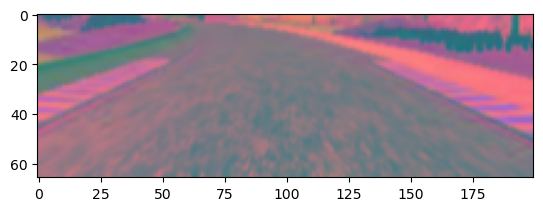

In [56]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])

print(X_train.shape)

(1010, 66, 200, 3)


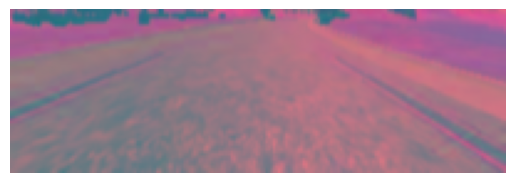

In [57]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

## Nvidia Model
<img src="NVIDIA-Convolutional-Neural-Network-13.jpg">

In [59]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='relu'))
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [60]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

C:\Users\gujja\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [61]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
11/11 [==============================] - 5s 400ms/step - loss: 0.1196 - val_loss: 0.1050
Epoch 2/30
11/11 [==============================] - 4s 370ms/step - loss: 0.1196 - val_loss: 0.1063
Epoch 3/30
11/11 [==============================] - 3s 316ms/step - loss: 0.1193 - val_loss: 0.1056
Epoch 4/30
11/11 [==============================] - 3s 302ms/step - loss: 0.1189 - val_loss: 0.1038
Epoch 5/30
11/11 [==============================] - 4s 356ms/step - loss: 0.1181 - val_loss: 0.1034
Epoch 6/30
11/11 [==============================] - 4s 328ms/step - loss: 0.1141 - val_loss: 0.0950
Epoch 7/30
11/11 [==============================] - 4s 379ms/step - loss: 0.1152 - val_loss: 0.0866
Epoch 8/30
11/11 [==============================] - 3s 310ms/step - loss: 0.1036 - val_loss: 0.0823
Epoch 9/30
11/11 [==============================] - 4s 328ms/step - loss: 0.1073 - val_loss: 0.1039
Epoch 10/30
11/11 [==============================] - 4s 324ms/step - loss: 0.1104 - val_loss: 0.0826

Text(0.5, 0, 'Epoch')

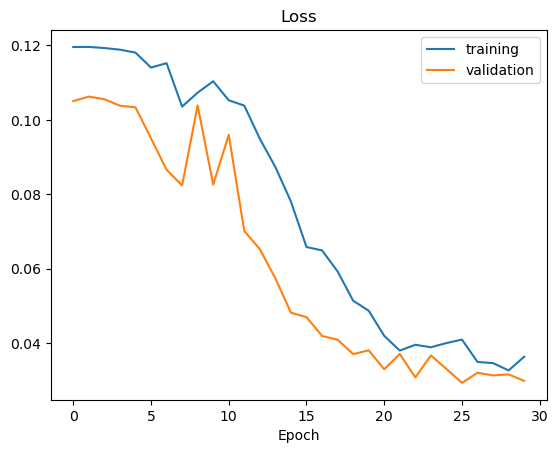

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [58]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))

    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [59]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

C:\Users\gujja\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [60]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
11/11 [==============================] - 6s 415ms/step - loss: 0.6383 - val_loss: 0.1137
Epoch 2/30
11/11 [==============================] - 4s 375ms/step - loss: 0.1529 - val_loss: 0.1520
Epoch 3/30
11/11 [==============================] - 4s 322ms/step - loss: 0.1474 - val_loss: 0.1135
Epoch 4/30
11/11 [==============================] - 3s 288ms/step - loss: 0.1327 - val_loss: 0.1139
Epoch 5/30
11/11 [==============================] - 4s 404ms/step - loss: 0.1268 - val_loss: 0.1120
Epoch 6/30
11/11 [==============================] - 4s 393ms/step - loss: 0.1241 - val_loss: 0.1117
Epoch 7/30
11/11 [==============================] - 3s 281ms/step - loss: 0.1177 - val_loss: 0.1091
Epoch 8/30
11/11 [==============================] - 3s 267ms/step - loss: 0.1140 - val_loss: 0.1030
Epoch 9/30
11/11 [==============================] - 4s 361ms/step - loss: 0.1067 - val_loss: 0.0964
Epoch 10/30
11/11 [==============================] - 3s 294ms/step - loss: 0.1031 - val_loss: 0.0904

Text(0.5, 0, 'Epoch')

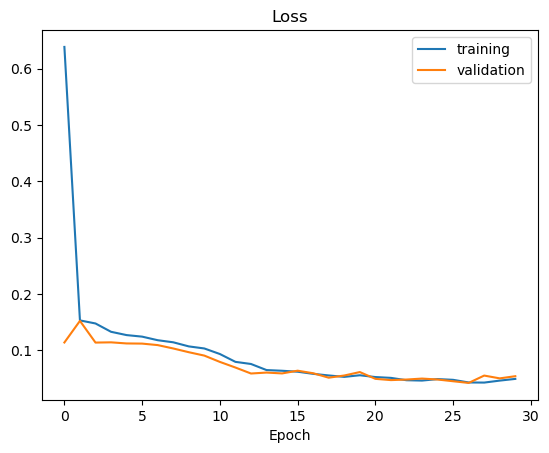

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [58]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))

    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [59]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

C:\Users\gujja\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [60]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
11/11 [==============================] - 4s 288ms/step - loss: 0.5626 - val_loss: 0.1078
Epoch 2/30
11/11 [==============================] - 3s 287ms/step - loss: 0.2145 - val_loss: 0.1119
Epoch 3/30
11/11 [==============================] - 3s 298ms/step - loss: 0.1490 - val_loss: 0.0985
Epoch 4/30
11/11 [==============================] - 4s 344ms/step - loss: 0.1365 - val_loss: 0.0975
Epoch 5/30
11/11 [==============================] - 3s 315ms/step - loss: 0.1214 - val_loss: 0.0924
Epoch 6/30
11/11 [==============================] - 3s 297ms/step - loss: 0.1195 - val_loss: 0.0858
Epoch 7/30
11/11 [==============================] - 3s 313ms/step - loss: 0.1070 - val_loss: 0.0803
Epoch 8/30
11/11 [==============================] - 3s 314ms/step - loss: 0.1033 - val_loss: 0.0673
Epoch 9/30
11/11 [==============================] - 3s 310ms/step - loss: 0.0936 - val_loss: 0.0821
Epoch 10/30
11/11 [==============================] - 3s 273ms/step - loss: 0.0997 - val_loss: 0.0703

Text(0.5, 0, 'Epoch')

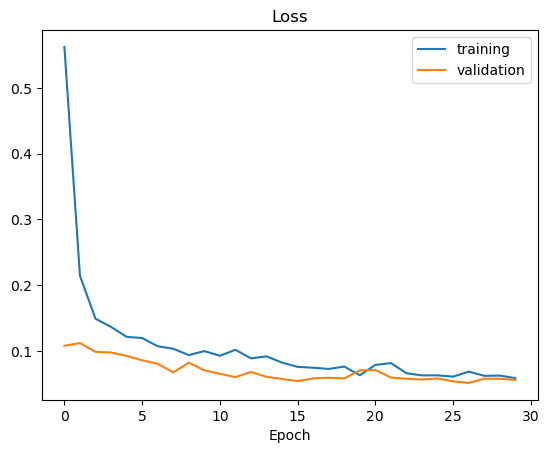

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

#### Saving our model

In [62]:
model.save('initial_model.h5')